# How does network structure influence training success ?

Try to fit a simple scalar function y=F(x) of a 2D variable x, with networks of varying layer structure, but fixed total number of neurons. 

Are deep networks really better than shallow ones? (answer: yes!)

In [35]:
import tensorflow as tf
import tensorflow.keras as tfk
import numpy as np
from tqdm import trange

In [ ]:
# switch off annoying tensorflow autograph warning
# (seems a known issue, may depend on tf version; try without it
# and see what happens!)
tf.autograph.set_verbosity(0)
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)


In [13]:
# our target function:

def F(x):
    return np.sin(4*(x[...,0]+x[...,1]))/(1+np.sum(x**2,axis=-1))

# defining the network:

def get_network(layers):
    network=tfk.Sequential([tfk.layers.Dense(n,activation='relu') 
        for n in layers] + [tfk.layers.Dense(1)])
    network.compile(loss='mse', optimizer='adam')
    return network

# running the training:

def run_training(network,n_samples=1000,batchsize=30):
    losses=[]
    for sample in trange(n_samples):
        x=3.0*np.random.randn(batchsize,2)
        losses.append(network.train_on_batch(x,F(x)[...,None]))
    return losses

In [17]:
import matplotlib.pyplot as plt

# plot loss curves, the F(x) and the network approximation to F(x):
def plot_losses_and_fit(several_loss_curves,network,title):
    fig,ax=plt.subplots(ncols=3,figsize=[10,3],dpi=200)
    for loss in several_loss_curves:
        ax[0].plot(loss,alpha=0.5)
    ax[0].set_yscale("log", base=10)
    ax[0].set_title(title)
    npixels=100
    extent=[-3.0,3.0]
    vals=np.linspace(*extent,npixels)
    x=np.zeros([npixels,npixels,2])
    x[...,0],x[...,1]=vals[:,None],vals[None,:]
    ax[1].imshow(F(x),origin='lower',extent=extent + extent)
    ax[2].imshow(network(x).numpy()[...,0],origin='lower', extent=extent + extent)
    plt.show()


In [36]:
# run several different layer configurations, each of them 3 times (for statistics)
def try_layers(layers_choices,n_samples=5000,batchsize=30,print_summary=False):
    for layers in layers_choices:
        losses_combined=[]
        for trial in range(3):
            network=get_network(layers)
            losses=run_training(network=network,n_samples=n_samples,batchsize=batchsize)
            print("Layers: ", layers, " Final loss: ", losses[-1])
            losses_combined.append(losses)
        plot_losses_and_fit(losses_combined,network,str(layers))
    if print_summary:
        print(network.summary())

## Overall 40 neurons, trying up to three hidden layers

Three layers work better than one. Note that here we keep the total number of neurons fixed, which does NOT mean a fixed number of training parameters! (for a comparison regarding number of parameters, see further below)

100%|██████████| 5000/5000 [00:09<00:00, 540.00it/s]


Layers:  [40]  Final loss:  0.03881770372390747


100%|██████████| 5000/5000 [00:10<00:00, 495.72it/s]


Layers:  [40]  Final loss:  0.03706936538219452


100%|██████████| 5000/5000 [00:09<00:00, 553.83it/s]


Layers:  [40]  Final loss:  0.04477272555232048


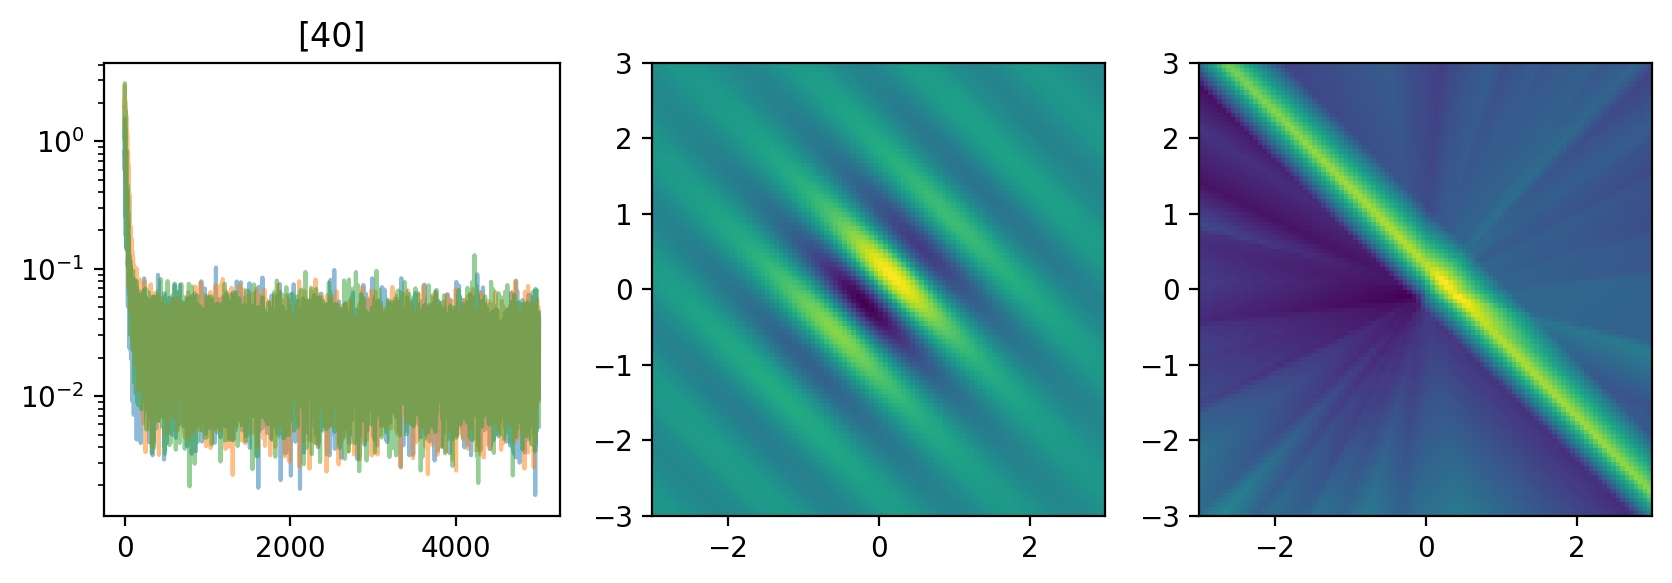

100%|██████████| 5000/5000 [00:08<00:00, 576.40it/s]


Layers:  [30, 10]  Final loss:  0.014003869146108627


100%|██████████| 5000/5000 [00:15<00:00, 325.45it/s]


Layers:  [30, 10]  Final loss:  0.021320896223187447


100%|██████████| 5000/5000 [00:23<00:00, 209.27it/s]


Layers:  [30, 10]  Final loss:  0.043700411915779114


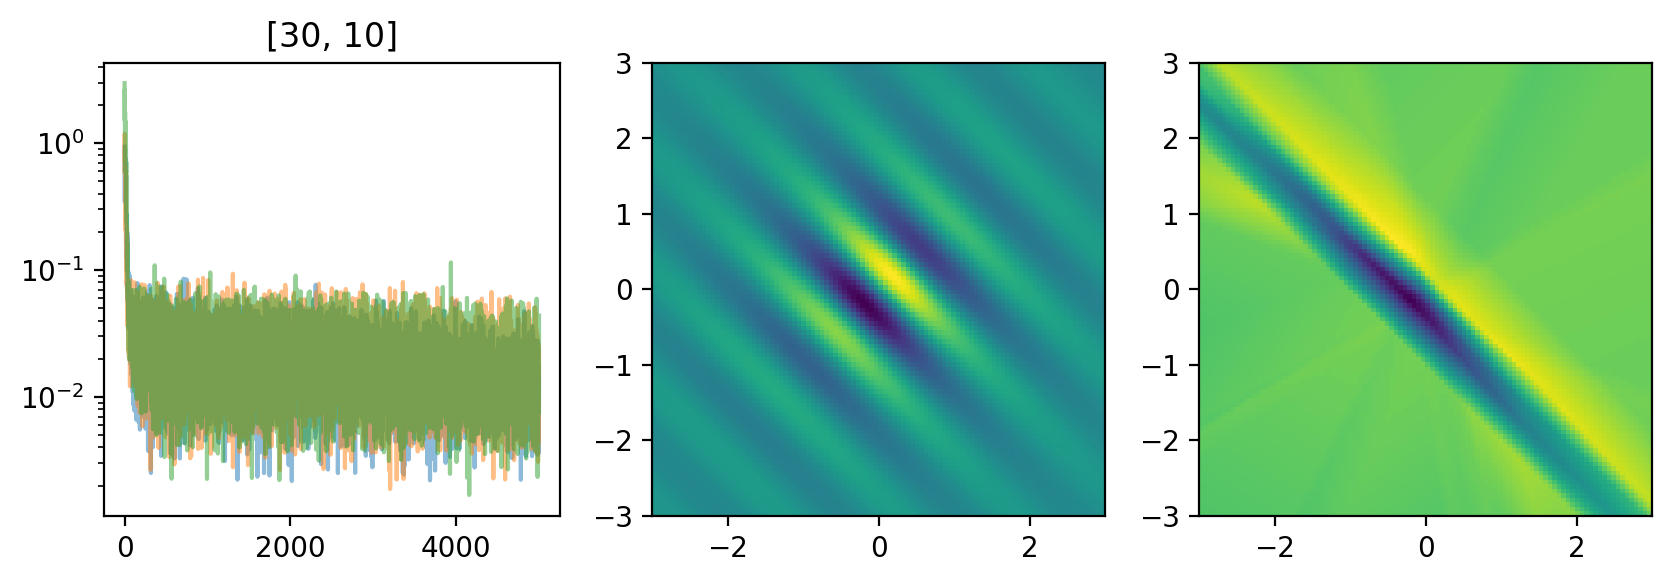

100%|██████████| 5000/5000 [00:09<00:00, 515.84it/s]


Layers:  [20, 20]  Final loss:  0.005028972402215004


100%|██████████| 5000/5000 [00:11<00:00, 421.18it/s]


Layers:  [20, 20]  Final loss:  0.023246189579367638


100%|██████████| 5000/5000 [00:09<00:00, 543.20it/s]


Layers:  [20, 20]  Final loss:  0.0074406578205525875


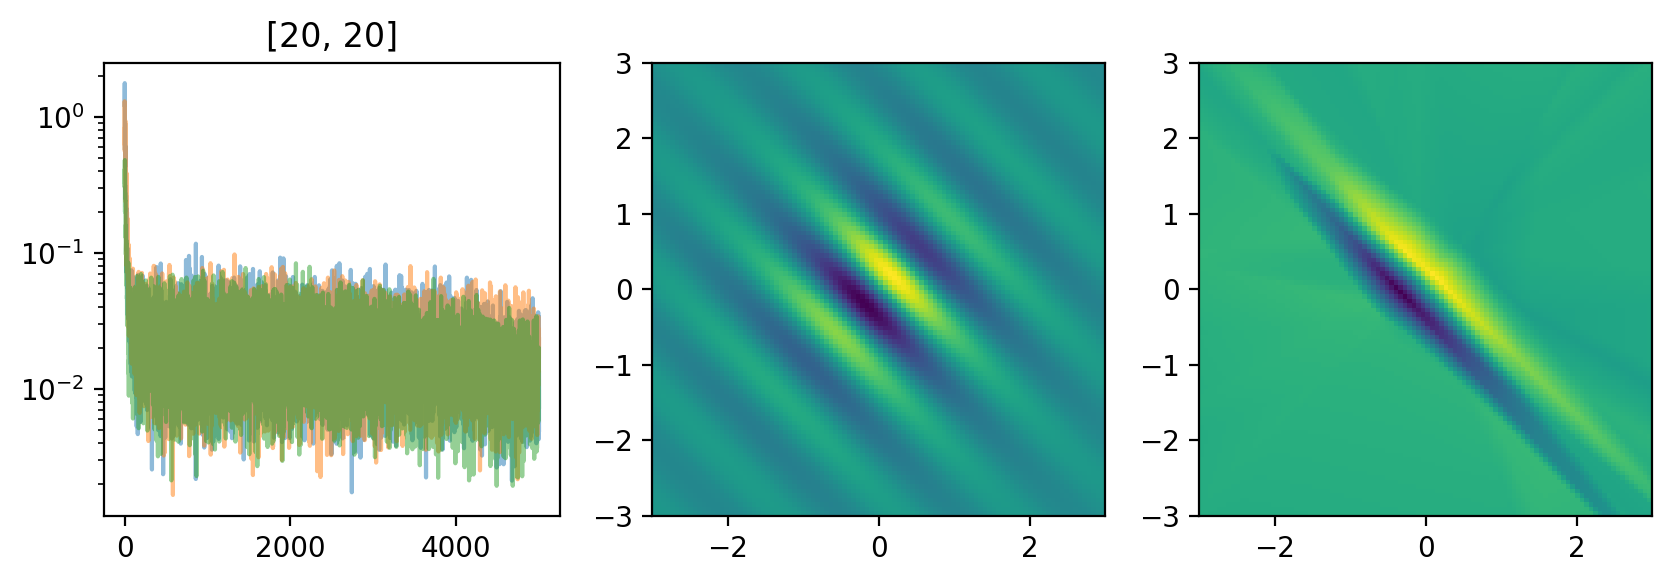

100%|██████████| 5000/5000 [00:08<00:00, 564.43it/s]


Layers:  [10, 30]  Final loss:  0.009735086001455784


100%|██████████| 5000/5000 [00:15<00:00, 321.40it/s]


Layers:  [10, 30]  Final loss:  0.00632063951343298


100%|██████████| 5000/5000 [00:20<00:00, 240.31it/s]


Layers:  [10, 30]  Final loss:  0.007391459308564663


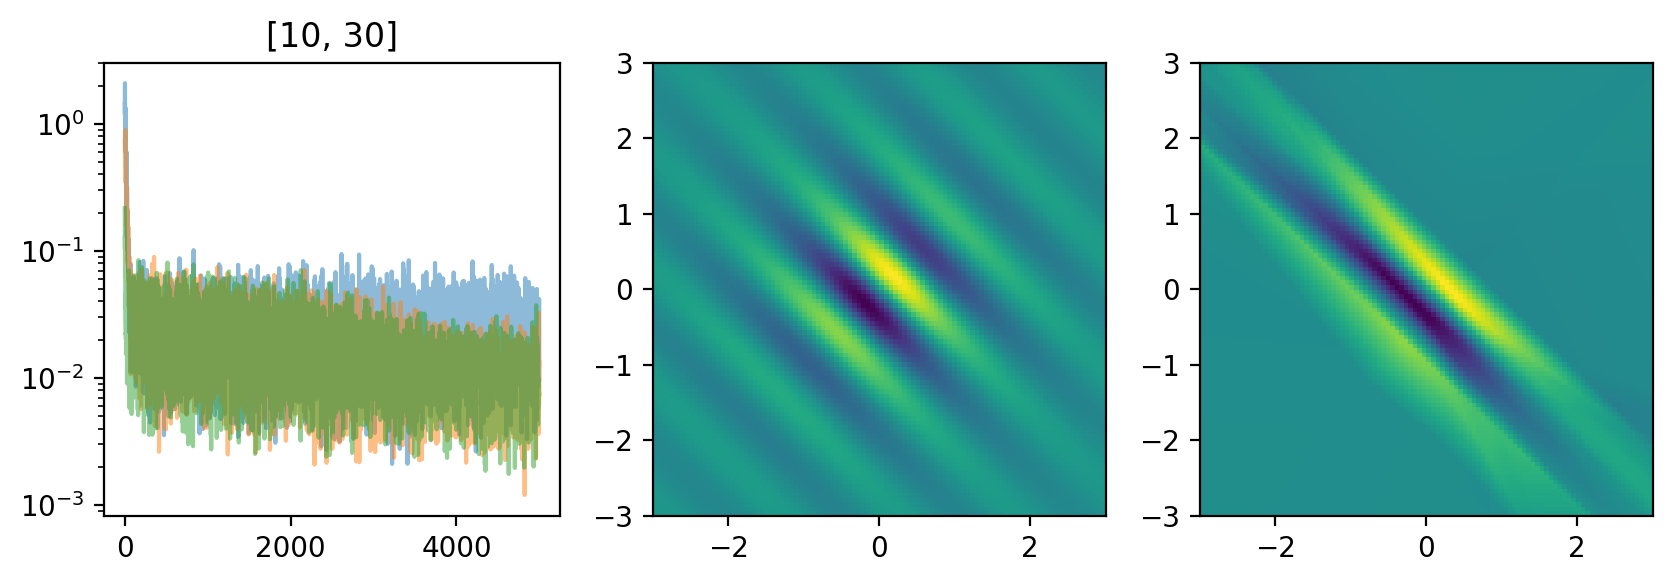

100%|██████████| 5000/5000 [00:08<00:00, 574.02it/s]


Layers:  [13, 13, 14]  Final loss:  0.005861583165824413


100%|██████████| 5000/5000 [00:10<00:00, 484.14it/s]


Layers:  [13, 13, 14]  Final loss:  0.008225765079259872


100%|██████████| 5000/5000 [00:10<00:00, 491.03it/s]


Layers:  [13, 13, 14]  Final loss:  0.007401768583804369


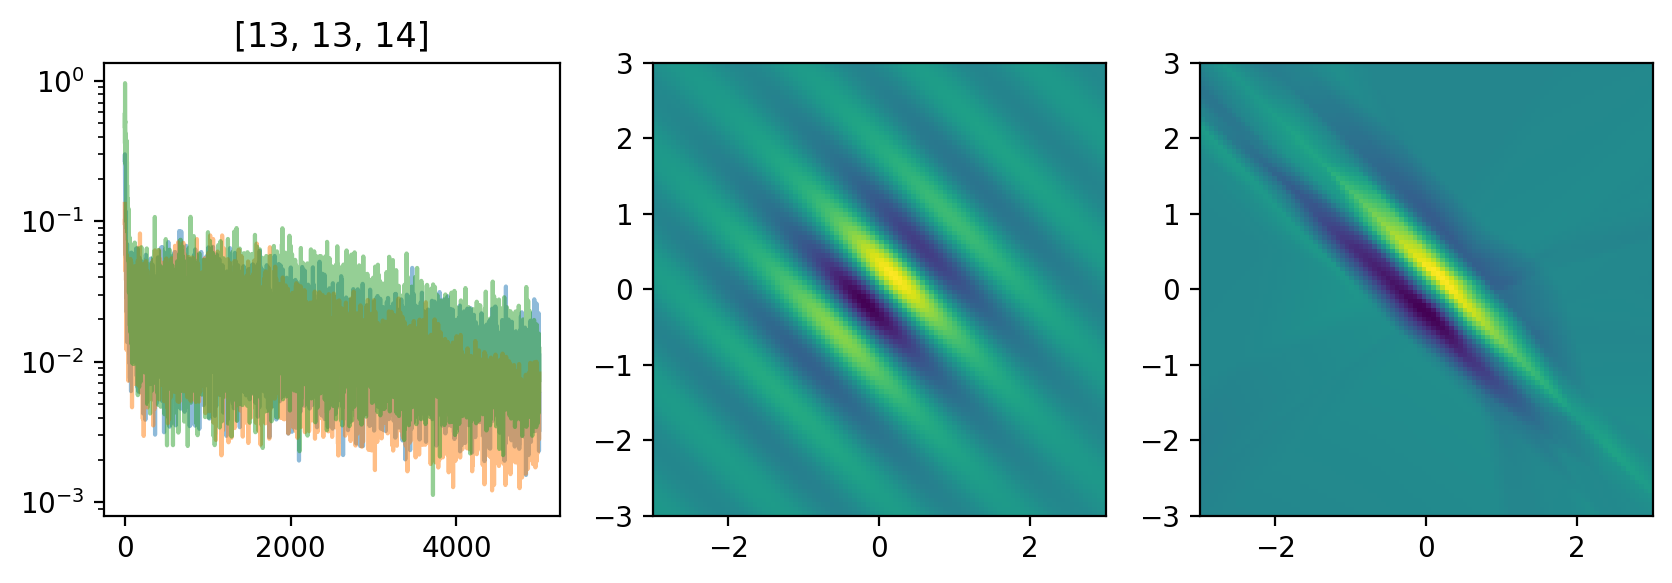

100%|██████████| 5000/5000 [00:10<00:00, 466.21it/s]


Layers:  [20, 10, 10]  Final loss:  0.010502730496227741


100%|██████████| 5000/5000 [00:21<00:00, 236.85it/s]


Layers:  [20, 10, 10]  Final loss:  0.006878419313579798


100%|██████████| 5000/5000 [00:18<00:00, 274.27it/s]


Layers:  [20, 10, 10]  Final loss:  0.01676911488175392


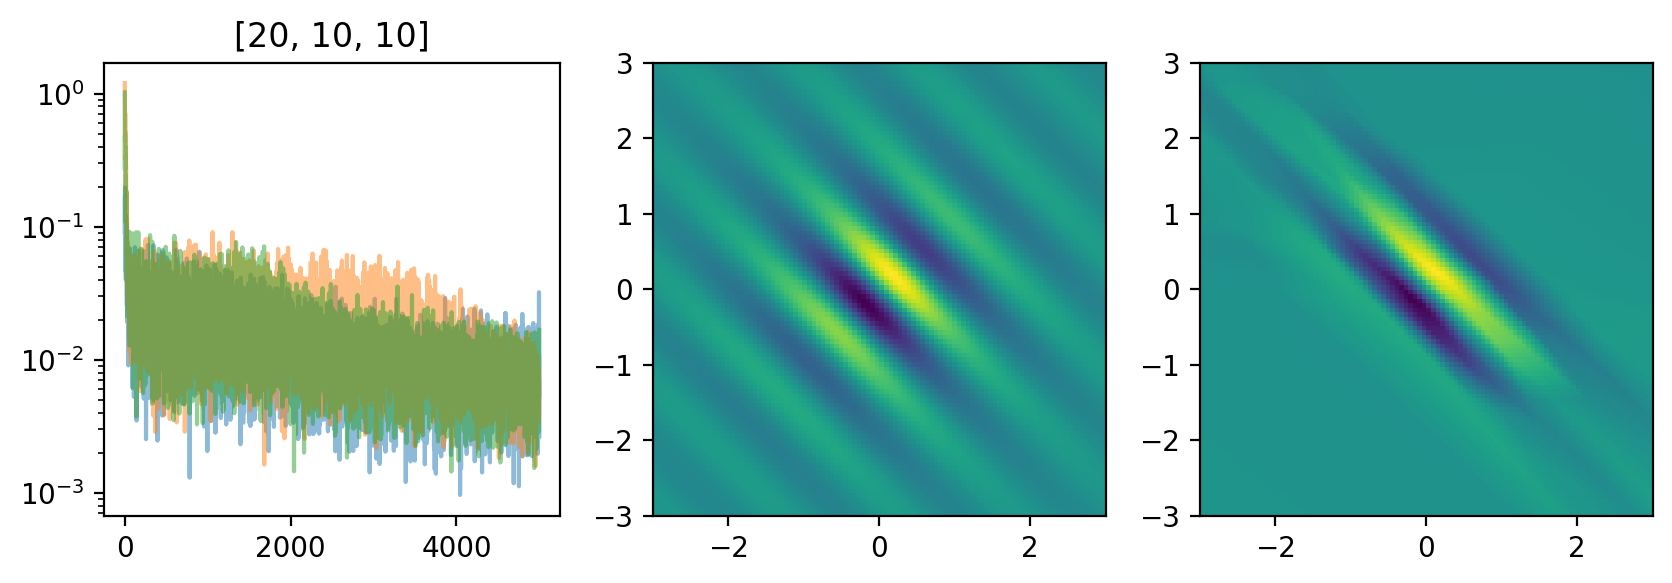

100%|██████████| 5000/5000 [00:08<00:00, 568.85it/s]


Layers:  [10, 20, 10]  Final loss:  0.0016246583545580506


100%|██████████| 5000/5000 [00:09<00:00, 545.15it/s]


Layers:  [10, 20, 10]  Final loss:  0.007126134354621172


100%|██████████| 5000/5000 [00:09<00:00, 508.97it/s]


Layers:  [10, 20, 10]  Final loss:  0.007385642267763615


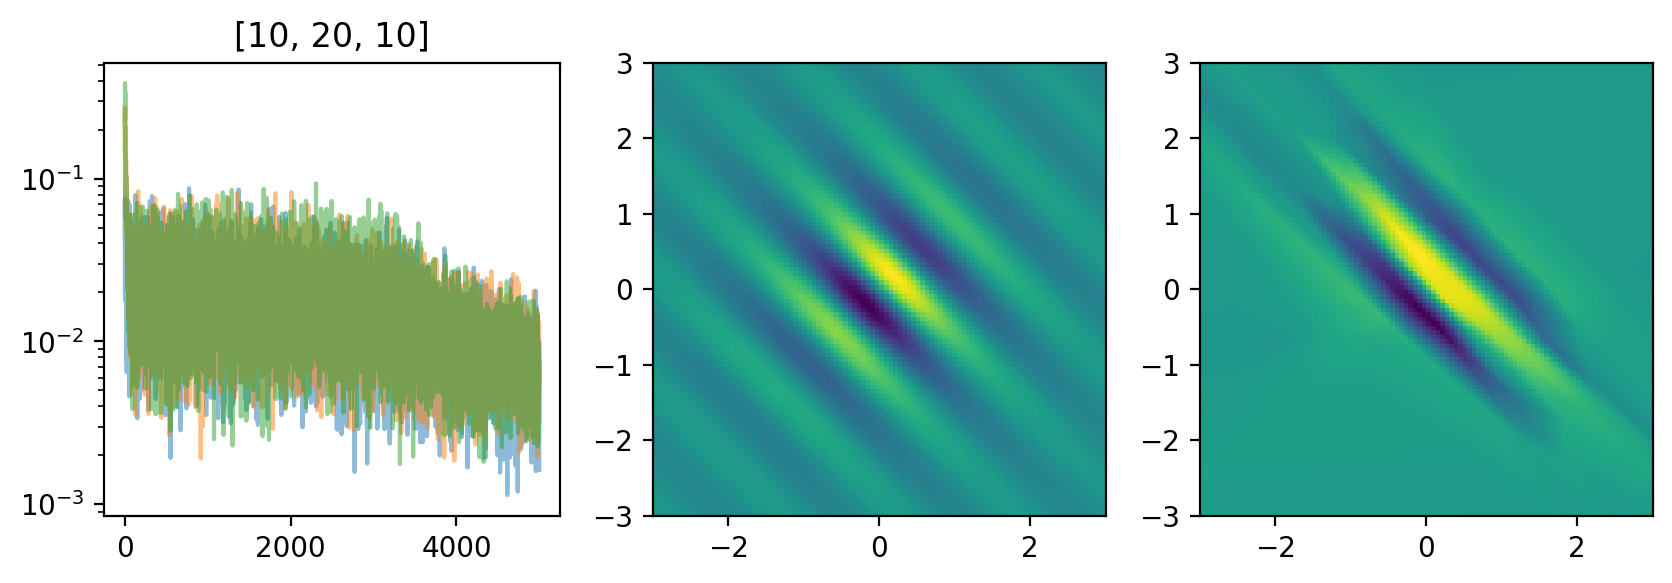

100%|██████████| 5000/5000 [00:08<00:00, 593.63it/s]


Layers:  [10, 10, 20]  Final loss:  0.007675110828131437


100%|██████████| 5000/5000 [00:20<00:00, 245.58it/s]


Layers:  [10, 10, 20]  Final loss:  0.01287628524005413


100%|██████████| 5000/5000 [00:14<00:00, 336.48it/s]


Layers:  [10, 10, 20]  Final loss:  0.00885890144854784


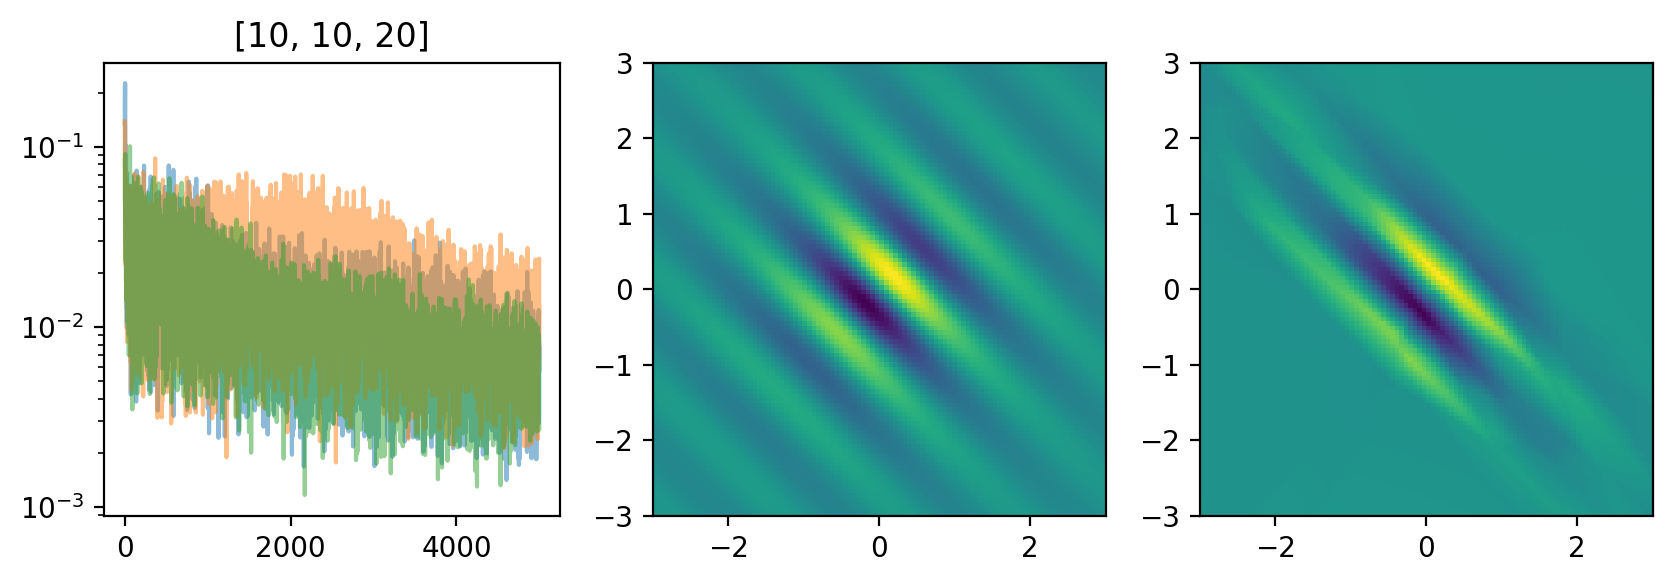

In [18]:
try_layers([[40],[30,10],[20,20],[10,30],[13,13,14],[20,10,10],[10,20,10],[10,10,20]])

## Increasing to [30,30,30] neurons, and then [50,50,50]

100%|██████████| 5000/5000 [00:08<00:00, 561.46it/s]


Layers:  [30, 30, 30]  Final loss:  0.0019052935531362891


100%|██████████| 5000/5000 [00:09<00:00, 519.12it/s]


Layers:  [30, 30, 30]  Final loss:  0.005704517476260662


100%|██████████| 5000/5000 [00:09<00:00, 515.03it/s]


Layers:  [30, 30, 30]  Final loss:  0.00318095157854259


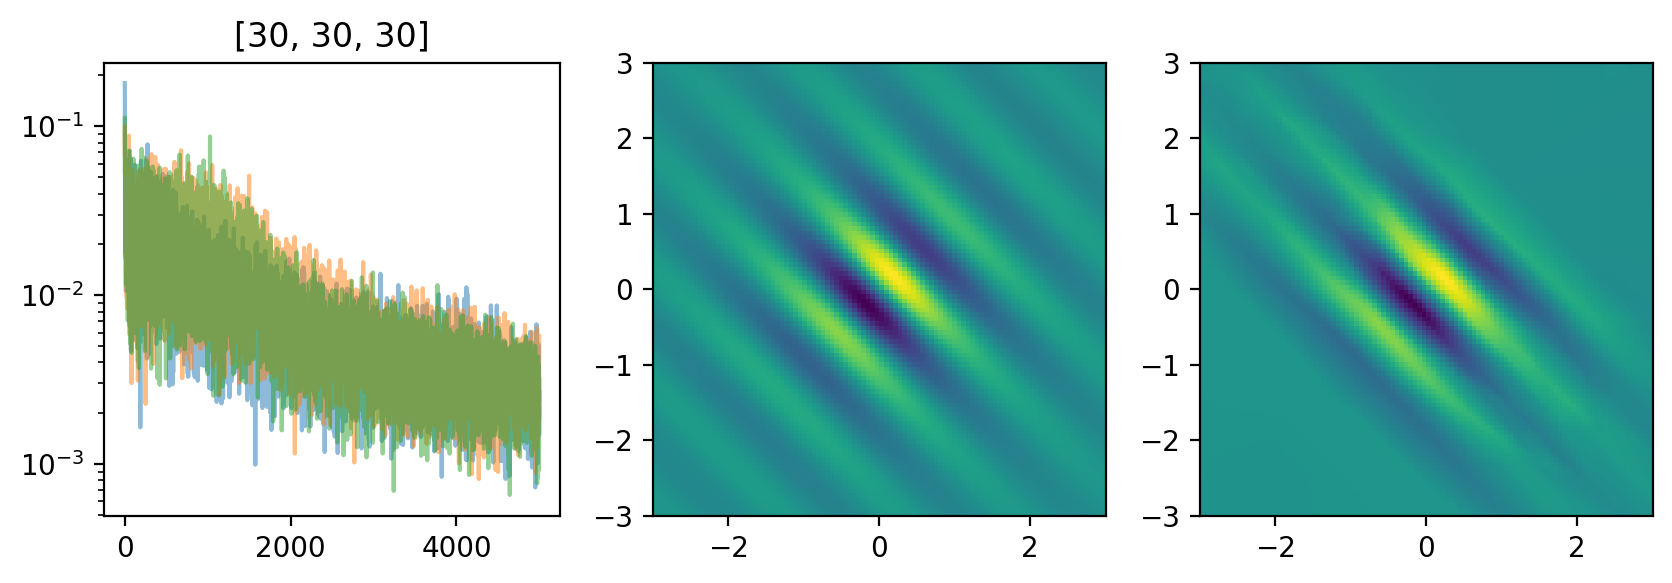

In [20]:
try_layers([[30,30,30]])

100%|██████████| 5000/5000 [00:09<00:00, 529.90it/s]


Layers:  [50, 50, 50]  Final loss:  0.0022796394769102335


100%|██████████| 5000/5000 [00:11<00:00, 449.50it/s]


Layers:  [50, 50, 50]  Final loss:  0.0012353324564173818


100%|██████████| 5000/5000 [00:09<00:00, 508.81it/s]


Layers:  [50, 50, 50]  Final loss:  0.0014770783018320799


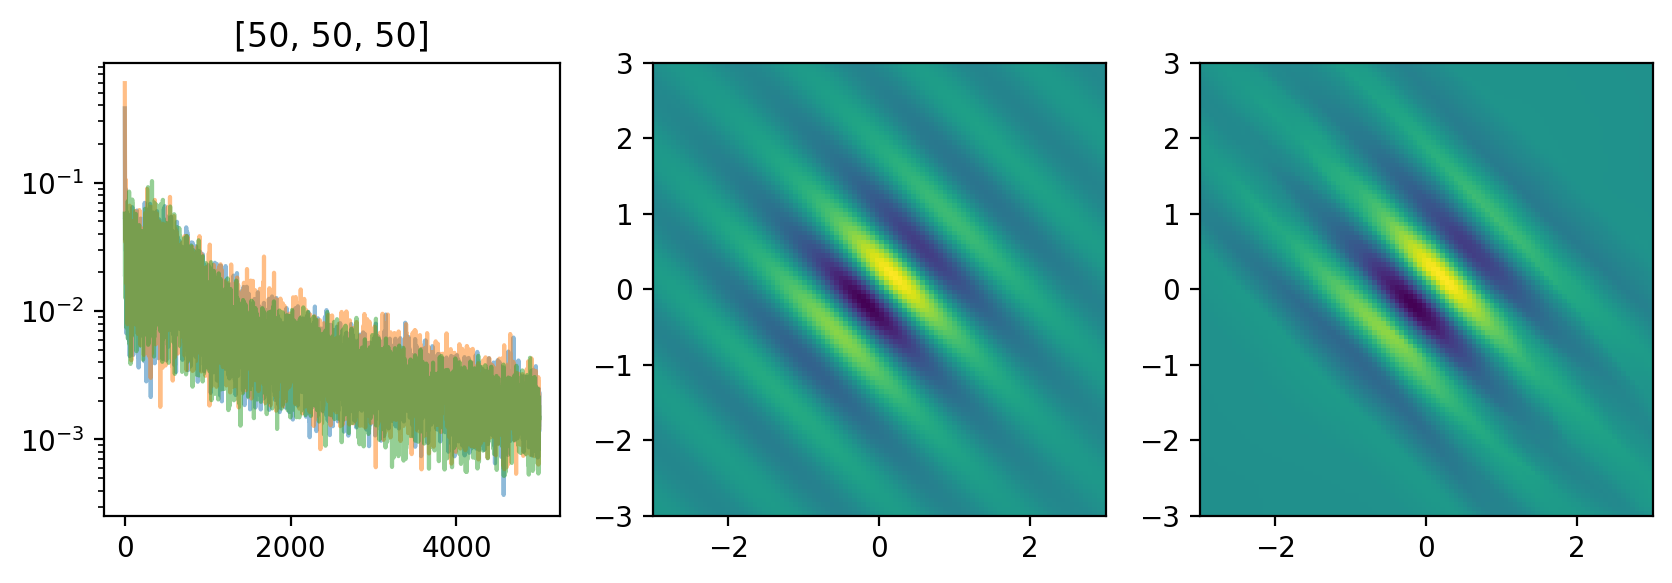

In [30]:
try_layers([[50,50,50]]) # has about 5000 parameters!

## Now: one hidden layer with 2500 neurons performs worse

...even though it has 10,000 parameters, as opposed to the 5000 parameters of the [50,50,50] model!

100%|██████████| 5000/5000 [00:09<00:00, 519.74it/s]


Layers:  [2500]  Final loss:  0.01415777113288641


100%|██████████| 5000/5000 [00:11<00:00, 425.51it/s]


Layers:  [2500]  Final loss:  0.008742153644561768


100%|██████████| 5000/5000 [00:11<00:00, 449.79it/s]


Layers:  [2500]  Final loss:  0.020851176232099533


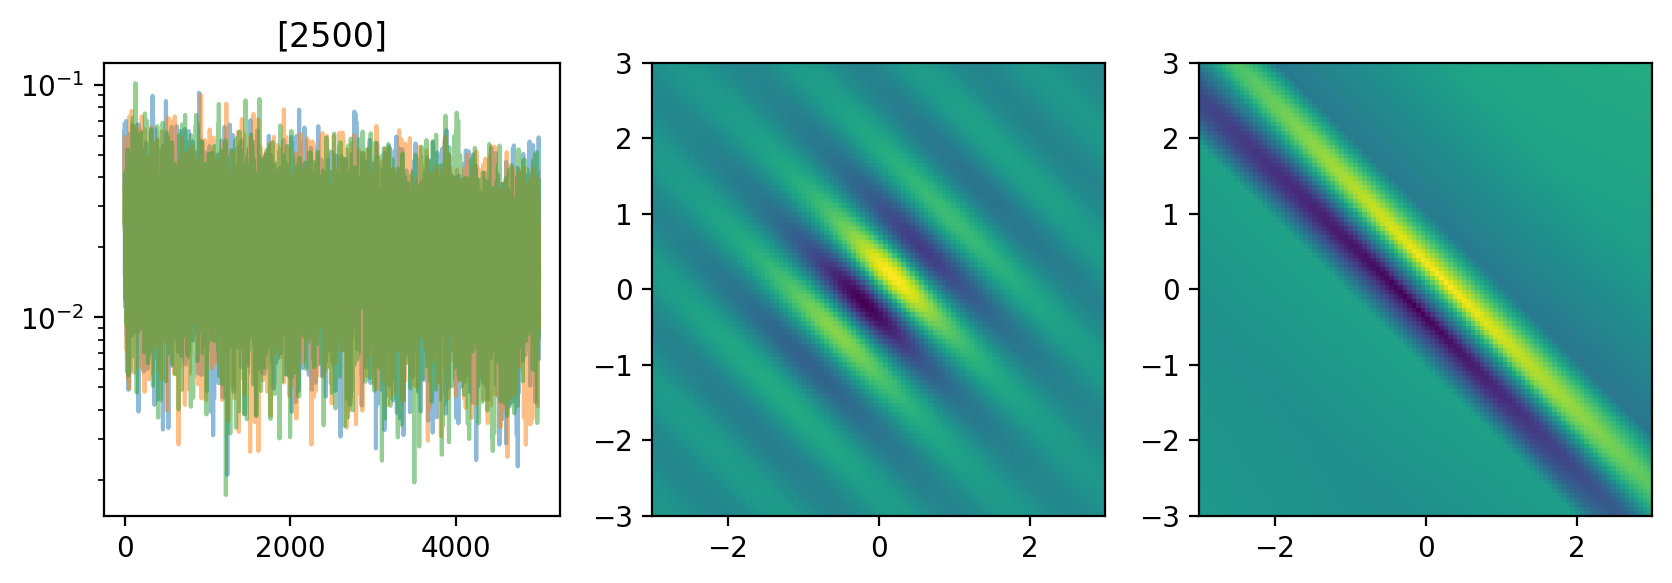

In [22]:
try_layers([[2500]]) # has about 10,000 parameters!

## Training longer of course also helps...

100%|██████████| 20000/20000 [00:35<00:00, 569.24it/s]


Layers:  [50, 50, 50]  Final loss:  0.00022801451268605888


100%|██████████| 20000/20000 [00:33<00:00, 598.88it/s]


Layers:  [50, 50, 50]  Final loss:  0.00034396658884361386


100%|██████████| 20000/20000 [00:32<00:00, 611.81it/s]


Layers:  [50, 50, 50]  Final loss:  0.0003031168016605079


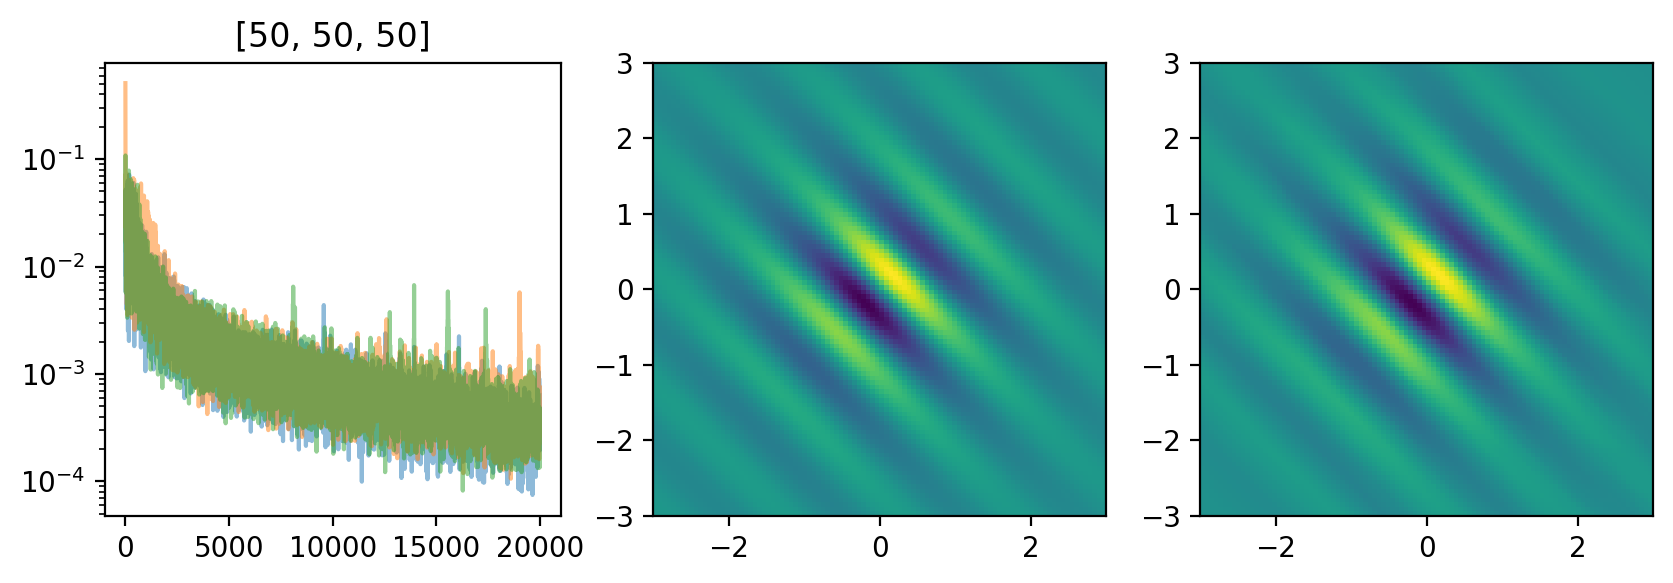

In [32]:
try_layers([[50,50,50]],n_samples=20000) # just training longer: very nice fit!

100%|██████████| 20000/20000 [00:31<00:00, 633.53it/s]


Layers:  [10, 10, 10]  Final loss:  0.006093125324696302


100%|██████████| 20000/20000 [00:35<00:00, 568.28it/s]


Layers:  [10, 10, 10]  Final loss:  0.0035895262844860554


100%|██████████| 20000/20000 [00:36<00:00, 555.15it/s]


Layers:  [10, 10, 10]  Final loss:  0.0029427611734718084


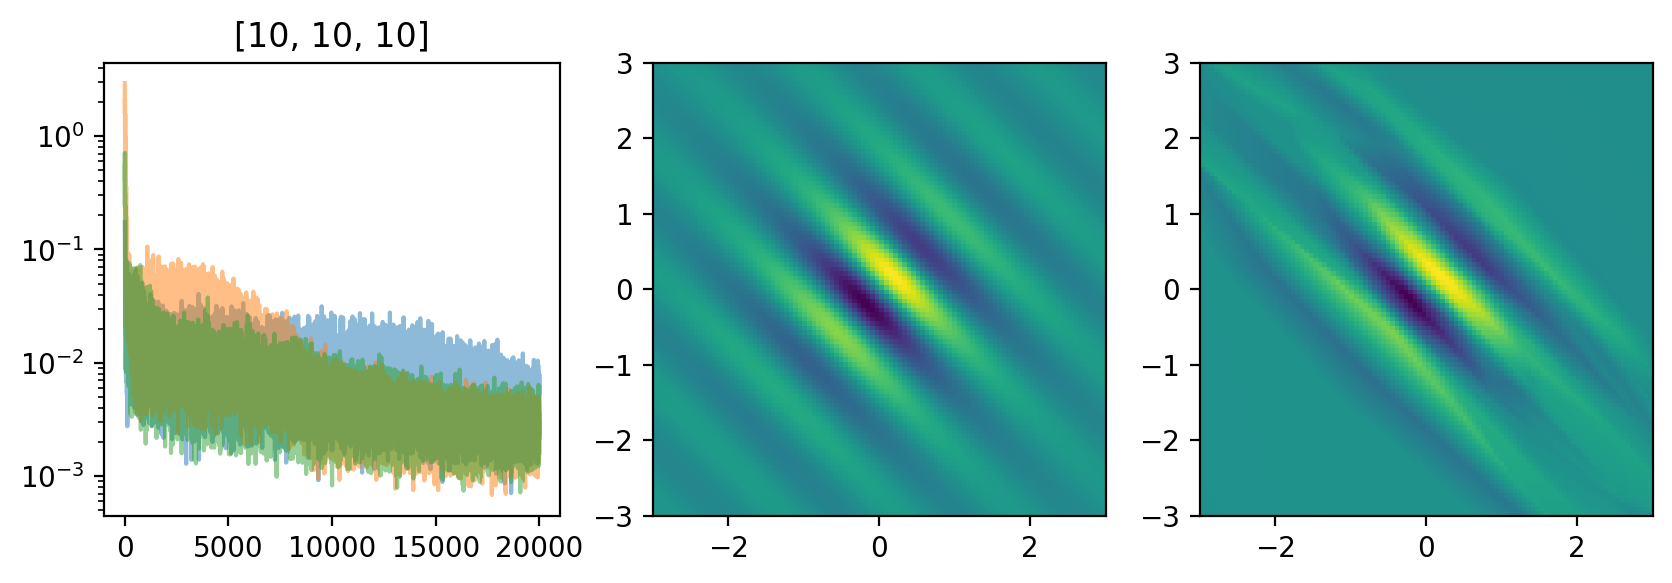

In [37]:
try_layers([[10,10,10]],n_samples=20000) # just training longer: can we use fewer parameters?